In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from google.cloud import bigquery
from google.oauth2 import service_account

In [3]:
key_path = './service_account/gentle-keyword-423715-j0-03be08ad6412.json'

credentials = service_account.Credentials.from_service_account_file(
    key_path,
    scopes=["https://www.googleapis.com/auth/bigquery"]
)

In [4]:
from google.cloud import bigquery

client = bigquery.Client(
    credentials = credentials,
    project=credentials.project_id
)

In [5]:
query = """
SELECT 
  oi.order_id,
  oi.id order_items_id,
  oi.user_id,
  oi.product_id,
  p.name,
  p.brand, 
  p.category, 
  p.cost, 
  p.retail_price,
  oi.sale_price,
  oi.sale_price * o.num_of_item totalSales,
  (oi.sale_price - p.cost) * o.num_of_item totalRevenue,
  o.gender,
  o.created_at,
  o.num_of_item
FROM `bigquery-public-data.thelook_ecommerce.orders` o
  INNER JOIN `bigquery-public-data.thelook_ecommerce.order_items` oi
    ON o.order_id = oi.order_id
  INNER JOIN `bigquery-public-data.thelook_ecommerce.products` p
    ON oi.product_id = p.id
WHERE 
  o.status = 'Complete'
  AND
  (EXTRACT(YEAR FROM o.created_at) >= 2023)
"""

df = client.query(query).to_dataframe()
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28087 entries, 0 to 28086
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   order_id        28087 non-null  Int64              
 1   order_items_id  28087 non-null  Int64              
 2   user_id         28087 non-null  Int64              
 3   product_id      28087 non-null  Int64              
 4   name            28086 non-null  object             
 5   brand           28063 non-null  object             
 6   category        28087 non-null  object             
 7   cost            28087 non-null  float64            
 8   retail_price    28087 non-null  float64            
 9   sale_price      28087 non-null  float64            
 10  totalSales      28087 non-null  float64            
 11  totalRevenue    28087 non-null  float64            
 12  gender          28087 non-null  object             
 13  created_at      28087 non-null 

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\pyarrow\pandas_compat.py:766: DeprecationWarning: DatetimeTZBlock is deprecated and will be removed in a future version. Use public APIs instead.
  klass=_int.DatetimeTZBlock,
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\pandas\core\frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(


,order_id,order_items_id,user_id,product_id,name,brand,category,cost,retail_price,sale_price,totalSales,totalRevenue,gender,created_at,num_of_item
0,123267,178342,98867,8033,Embroidered Capri Set - Sizes: SMMEDLG,Carol Wright Gifts,Clothing Sets,11.494250,19.990000,19.990000,39.980000,16.991500,F,2023-02-25 04:49:00+00:00,2
1,97926,141701,78217,8038,Embroidered Capri Set - Sizes: 1X2X3X4X,Carol Wright Gifts,Clothing Sets,13.862970,22.990000,22.990000,68.969999,27.381090,F,2024-03-17 01:26:00+00:00,3
2,120527,174384,96640,8032,Aeropostale Womens; Juniors Long Sleeve Logo G...,Aeropostale,Clothing Sets,21.010500,34.500000,34.500000,69.000000,26.979000,F,2023-01-22 04:02:00+00:00,2
3,10421,15063,8394,8059,Aeropostale Juniors' Times Square 87 Graphic T...,Aeropostale,Clothing Sets,25.753561,39.990002,39.990002,39.990002,14.236441,F,2023-08-10 02:28:00+00:00,1
4,115460,167041,92547,8027,Only Necessities Plus Size Peachskin 3 piece P...,Only Necessities,Clothing Sets,35.798491,54.990002,54.990002,109.980003,38.383022,F,2024-05-13 01:10:00+00:00,2


In [6]:
df['order_id'] = df['order_id'].astype(str)
df['order_items_id'] = df['order_items_id'].astype(str)
df['user_id'] = df['user_id'].astype(str)
df['product_id'] = df['product_id'].astype(str)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28087 entries, 0 to 28086
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   order_id        28087 non-null  object             
 1   order_items_id  28087 non-null  object             
 2   user_id         28087 non-null  object             
 3   product_id      28087 non-null  object             
 4   name            28086 non-null  object             
 5   brand           28063 non-null  object             
 6   category        28087 non-null  object             
 7   cost            28087 non-null  float64            
 8   retail_price    28087 non-null  float64            
 9   sale_price      28087 non-null  float64            
 10  totalSales      28087 non-null  float64            
 11  totalRevenue    28087 non-null  float64            
 12  gender          28087 non-null  object             
 13  created_at      28087 non-null 

In [7]:
# explore = df.set_index('created_at').groupby('category').resample('M').agg({'num_of_item': 'sum', 'totalSales': 'sum'}).reset_index()
# # explore = explore[explore['category'] == 'Fashion Hoodies & Sweatshirts']
# explore = explore[explore['category'] == 'Jeans']
# print(explore.describe(include='all'))

# plt.plot(explore['created_at'], explore['totalSales'])

**Start From Fashion Hoodies & Sweatshirts**

In [8]:
# data = df[df['category'] == 'Fashion Hoodies & Sweatshirts']
data = df.copy()
print(data['user_id'].nunique())
# data = df
print(data.info())
print("Number of unique items: ", data['name'].nunique())
data.describe()

17688
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28087 entries, 0 to 28086
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   order_id        28087 non-null  object             
 1   order_items_id  28087 non-null  object             
 2   user_id         28087 non-null  object             
 3   product_id      28087 non-null  object             
 4   name            28086 non-null  object             
 5   brand           28063 non-null  object             
 6   category        28087 non-null  object             
 7   cost            28087 non-null  float64            
 8   retail_price    28087 non-null  float64            
 9   sale_price      28087 non-null  float64            
 10  totalSales      28087 non-null  float64            
 11  totalRevenue    28087 non-null  float64            
 12  gender          28087 non-null  object             
 13  created_at      28087 non

,cost,retail_price,sale_price,totalSales,totalRevenue,num_of_item
count,28087.000000,28087.000000,28087.000000,28087.000000,28087.000000,28087.0
mean,28.974338,60.219443,60.219443,114.439899,59.351258,1.892157
std,32.371444,70.022020,70.022020,170.963814,93.279737,1.054222
min,0.177380,0.490000,0.490000,0.490000,0.312620,1.0
25%,11.350000,24.750000,24.750000,34.000000,16.920000,1.0
50%,19.872000,39.990002,39.990002,65.139999,32.854701,2.0
75%,34.734520,69.949997,69.949997,131.600006,66.902379,2.0
max,557.151002,999.000000,999.000000,3960.000000,2159.975991,4.0


In [12]:
currentDate = data['created_at'].max()
data_grouped = data.groupby('user_id').agg({'created_at': 'max', 'num_of_item': 'sum', 'totalRevenue': 'sum'})

data_grouped['recency'] = round((currentDate - data_grouped['created_at']) / pd.to_timedelta(1, 'day'))
data_grouped = data_grouped\
                .sort_values(by='recency')\
                .reset_index()\
                .rename(columns={'num_of_item': 'frequency', 'totalRevenue': 'monetary'})\
                .drop('created_at', axis=1)

data_grouped.describe()

,frequency,monetary,recency
count,17688.0,17688.000000,17688.000000
mean,3.004579,94.244616,192.578867
std,3.850023,164.904700,150.934312
min,1.0,0.312620,0.000000
25%,1.0,15.861032,57.000000
50%,1.0,35.730254,163.000000
75%,4.0,96.445445,310.000000
max,32.0,2605.199781,515.000000


In [18]:
data_grouped.columns

Index(['user_id', 'created_at', 'frequency', 'monetary', 'recency'], dtype='object')

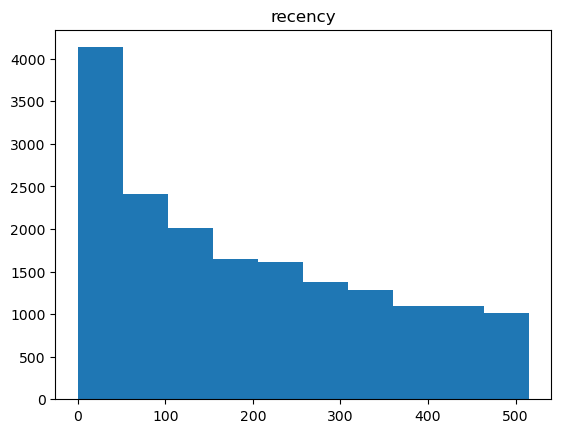

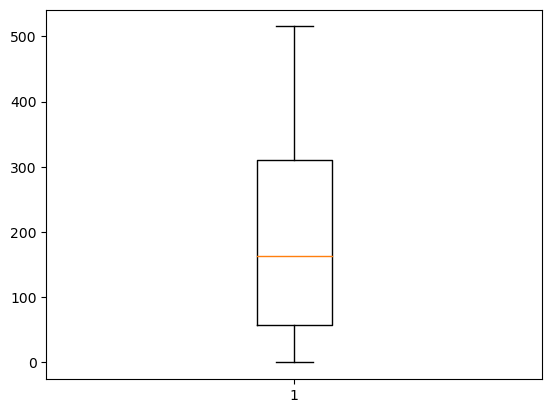

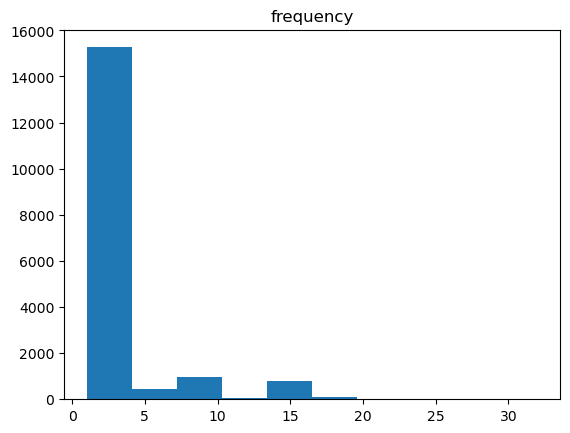

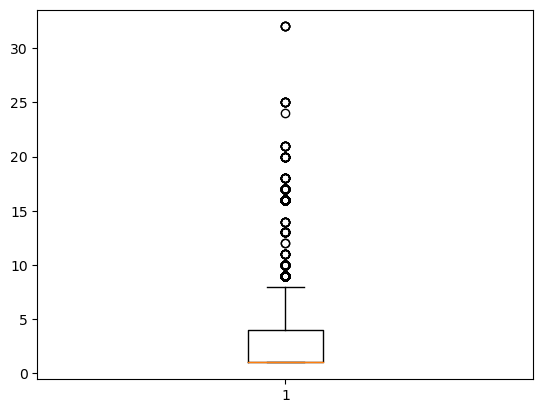

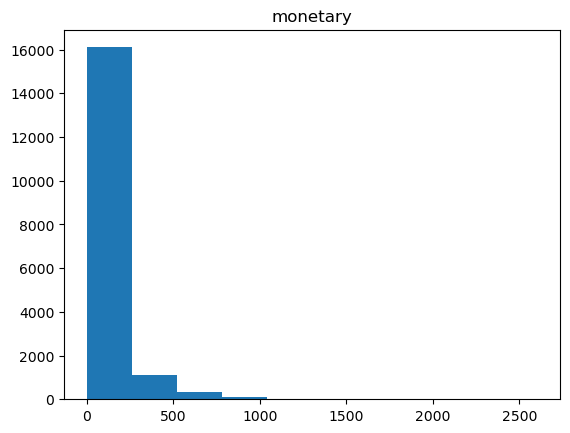

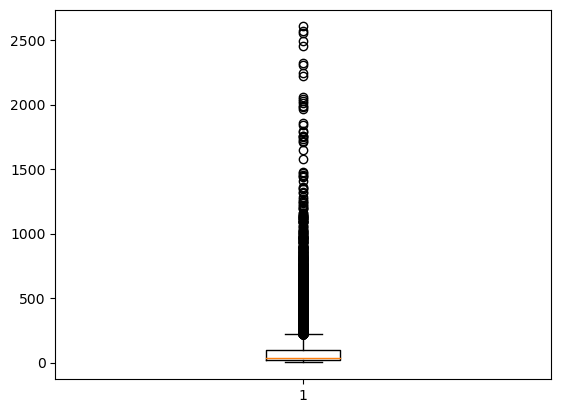

In [24]:
for c in ['recency', 'frequency', 'monetary']:
    plt.title(f"{c}")
    plt.hist(data_grouped[c])
    plt.show()
    plt.boxplot(data_grouped[c])
    plt.show()

In [25]:
data_filter = data_grouped[data_grouped['recency'] < 180]
print(data_filter.info())
data_filter.head()

<class 'pandas.core.frame.DataFrame'>
Index: 9370 entries, 0 to 9369
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   user_id     9370 non-null   object             
 1   created_at  9370 non-null   datetime64[ns, UTC]
 2   frequency   9370 non-null   Int64              
 3   monetary    9370 non-null   float64            
 4   recency     9370 non-null   float64            
dtypes: Int64(1), datetime64[ns, UTC](1), float64(2), object(1)
memory usage: 448.4+ KB
None


,user_id,created_at,frequency,monetary,recency
0,12631,2024-05-29 18:47:00+00:00,1,15.560000,0.0
1,97874,2024-05-29 18:46:47.546475+00:00,2,47.805451,0.0
2,63363,2024-05-29 08:01:57.955307+00:00,1,46.530000,0.0
3,57946,2024-05-29 19:13:47.586843+00:00,1,25.490399,0.0
4,78411,2024-05-29 12:09:00.968499+00:00,4,143.972998,0.0


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

X = data_filter.drop('user_id', axis=1)
model = make_pipeline(StandardScaler(), KMeans(n_clusters=3))
model.fit(X)

labels = list(model.named_steps['kmeans'].labels_)

data_filter['cluster'] = labels
print(data_filter.info())
data_filter.head()

<class 'pandas.core.frame.DataFrame'>
Index: 9370 entries, 0 to 9369
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   user_id     9370 non-null   object             
 1   created_at  9370 non-null   datetime64[ns, UTC]
 2   frequency   9370 non-null   Int64              
 3   monetary    9370 non-null   float64            
 4   recency     9370 non-null   float64            
 5   cluster     9370 non-null   int32              
dtypes: Int64(1), datetime64[ns, UTC](1), float64(2), int32(1), object(1)
memory usage: 485.0+ KB
None


C:\Users\Baha Tegar\AppData\Local\Temp\ipykernel_19764\1264128450.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filter['cluster'] = labels


,user_id,created_at,frequency,monetary,recency,cluster
0,12631,2024-05-29 18:47:00+00:00,1,15.560000,0.0,0
1,97874,2024-05-29 18:46:47.546475+00:00,2,47.805451,0.0,0
2,63363,2024-05-29 08:01:57.955307+00:00,1,46.530000,0.0,0
3,57946,2024-05-29 19:13:47.586843+00:00,1,25.490399,0.0,0
4,78411,2024-05-29 12:09:00.968499+00:00,4,143.972998,0.0,0


In [49]:
# import pickle
# # Save the model to a file
# with open('./model/model_kmeans.pkl', 'wb') as model_file:
#     pickle.dump(model, model_file)

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

transform = pca.fit_transform(data_filter[['recency', 'frequency', 'monetary']].values)

data_filter[['PCA1', 'PCA2']] = transform


C:\Users\Baha Tegar\AppData\Local\Temp\ipykernel_19764\2638455938.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filter[['PCA1', 'PCA2']] = transform
C:\Users\Baha Tegar\AppData\Local\Temp\ipykernel_19764\2638455938.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filter[['PCA1', 'PCA2']] = transform


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


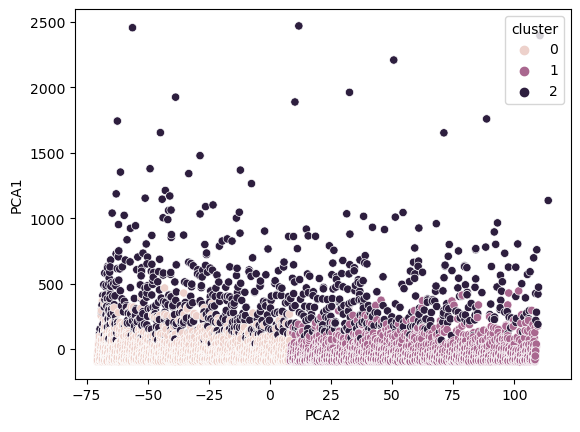

In [29]:
import seaborn as sns
sns.scatterplot(data=data_filter, y= 'PCA1', x='PCA2', hue='cluster',)
plt.show()

In [30]:
pivot_table = data_filter.pivot_table(
    values=['recency', 'frequency', 'monetary'],
    index='cluster',
    aggfunc=['mean', 'max', 'min', 'median']
)

pivot_table

mean                               max                       \
         frequency    monetary     recency frequency     monetary recency   
cluster                                                                     
0          2.09426   59.700781   30.805639        10   566.072847    78.0   
1         2.084583   58.245672  125.991231        10   544.040162   179.0   
2        13.449425  490.953456   68.178161        32  2570.185491   179.0   

              min                        median                      
        frequency    monetary recency frequency    monetary recency  
cluster                                                              
0               1    1.181700     0.0       1.0   32.593760    27.0  
1               1    1.070160    79.0       1.0   31.525000   124.0  
2               3  100.892001     0.0      16.0  407.292321    59.5

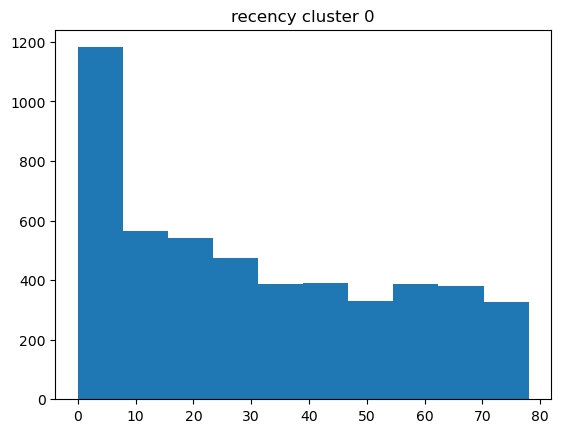

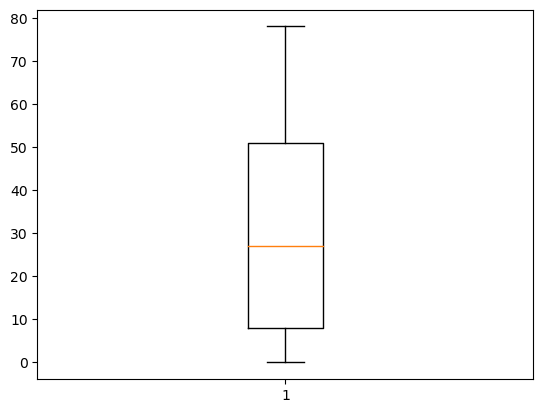

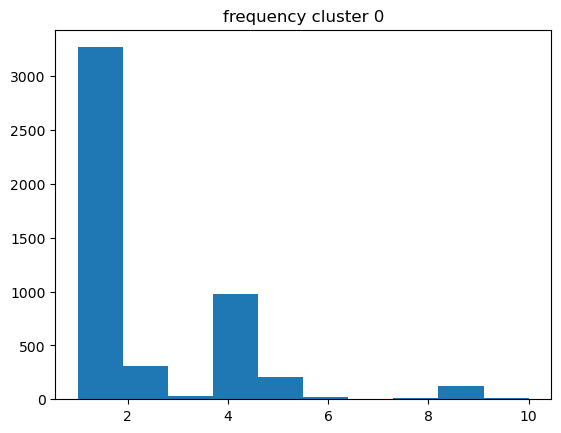

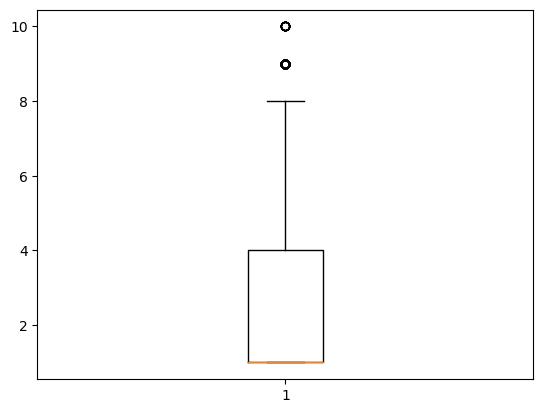

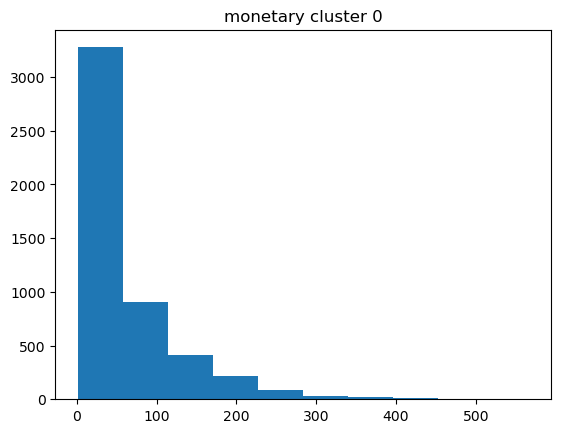

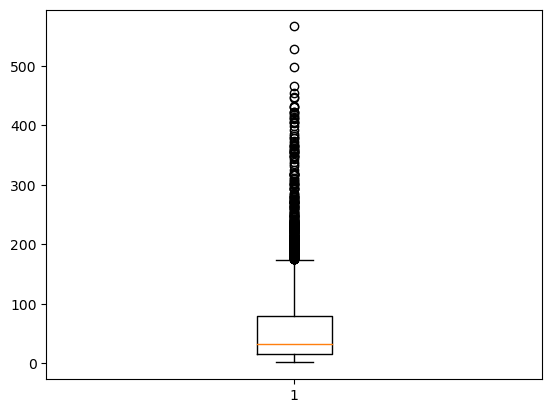

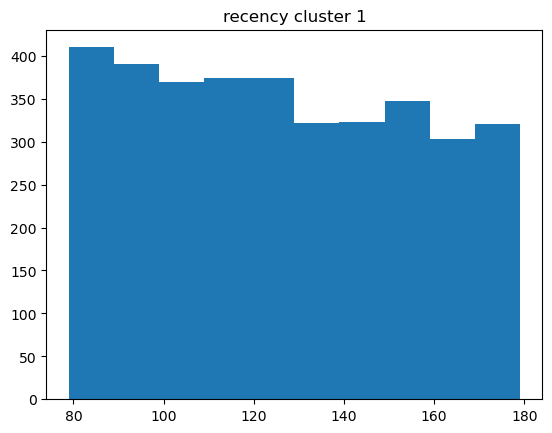

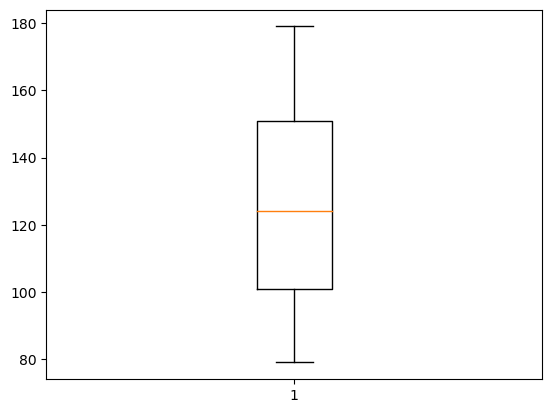

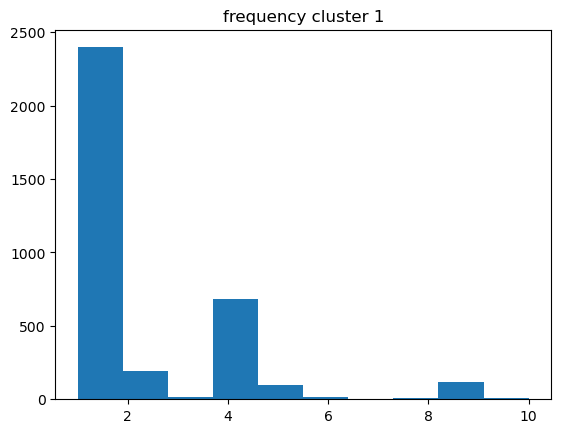

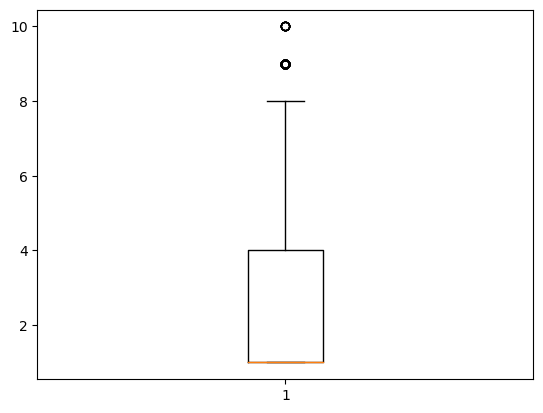

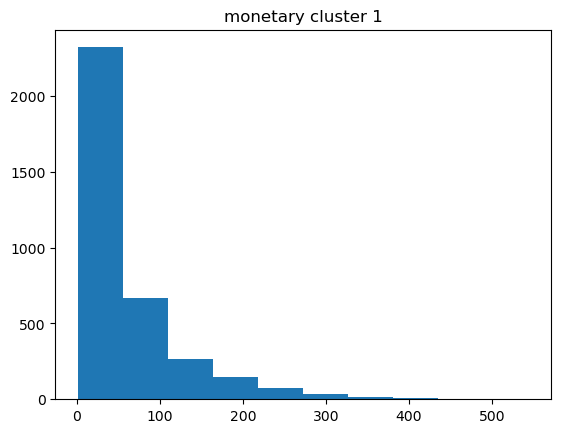

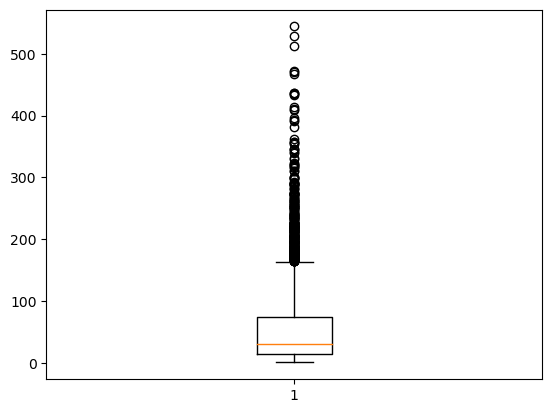

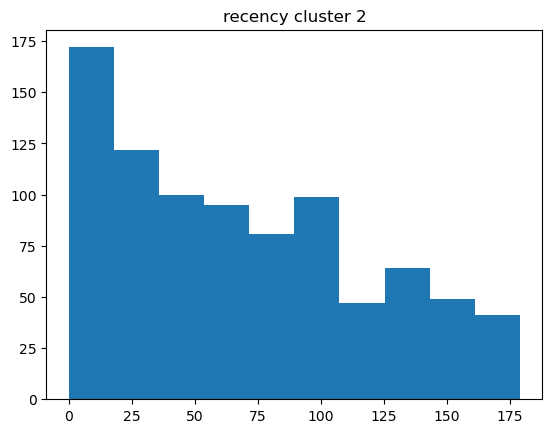

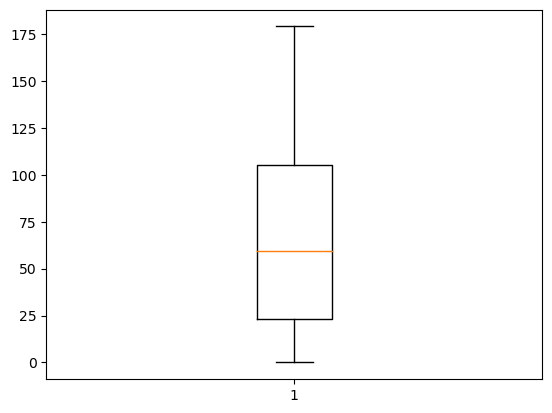

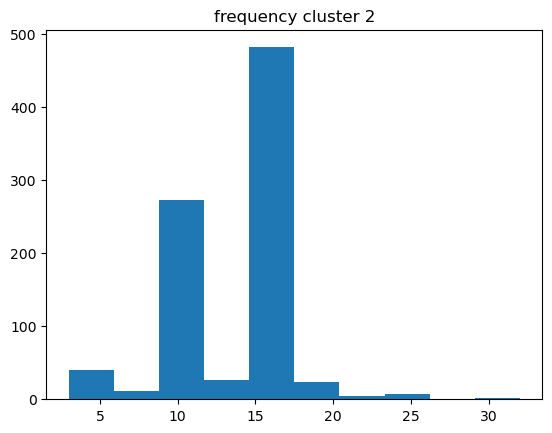

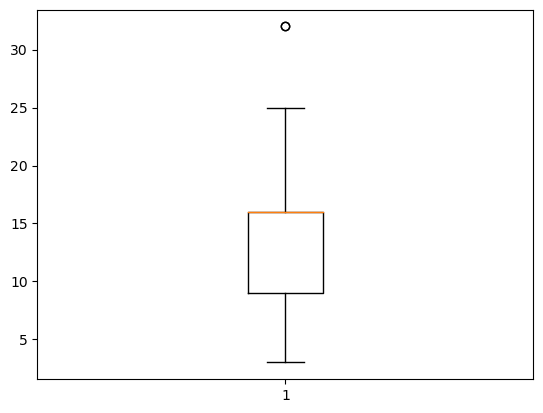

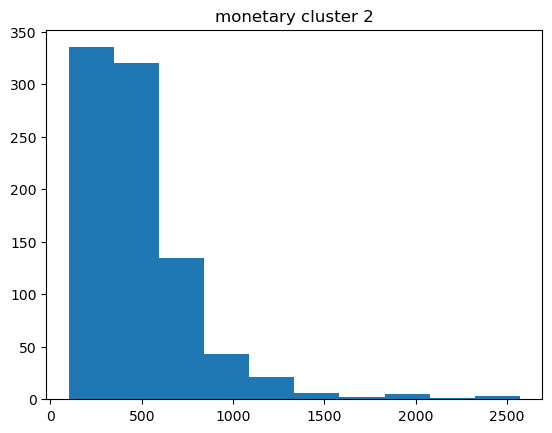

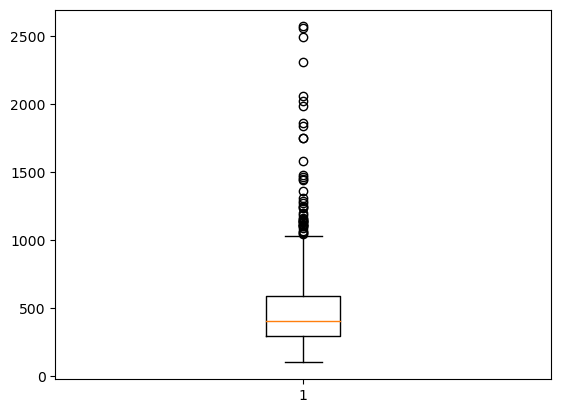

In [47]:
for cl in range(0, 3):
    temp = data_filter[data_filter['cluster'] == cl]
    for c in ['recency', 'frequency', 'monetary']:
        plt.title(f"{c} cluster {cl}")
        plt.hist(temp[c])
        plt.show()
        plt.boxplot(temp[c])
        plt.show()

In [53]:
# data_filter.to_csv('segmentation_result.csv', index=False)